In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
P = np.array([[0.64, 0.32, 0.04], [0.4, 0.5, 0.1], [0.25, 0.5, 0.25]])

In [3]:
def getPowersList(P, epsilon):
    P_powers = []
    currP = np.identity(3)
    while True:
        currP = np.matmul(currP, P)
        P_powers.append(currP)
        if len(P_powers) > 1 and np.linalg.det(P_powers[-1] - P_powers[-2]) < epsilon:
            return np.array(P_powers)
    
    

In [4]:
def plot_pi(list_of_powers, j):

    p0j = list_of_powers[:, 0, j]
    p1j = list_of_powers[:, 1, j]
    p2j = list_of_powers[:, 2, j]
    pij = list_of_powers[-1, 0, j]
    plt.plot(np.arange(len(p0j)), p0j)
    plt.plot(np.arange(len(p1j)), p1j)
    plt.plot(np.arange(len(p2j)), p2j)
    plt.plot()
    plt.axhline(y=pij, color='r', linestyle='-', label="pi")
    plt.xlabel("n")
    plt.ylabel("ai{}".format(j))

In [5]:
list_of_powers = getPowersList(P, 10e-30)
print(list_of_powers[-1])

[[0.51021212 0.40815844 0.08162944]
 [0.51019806 0.40816688 0.08163506]
 [0.510184   0.40817532 0.08164069]]


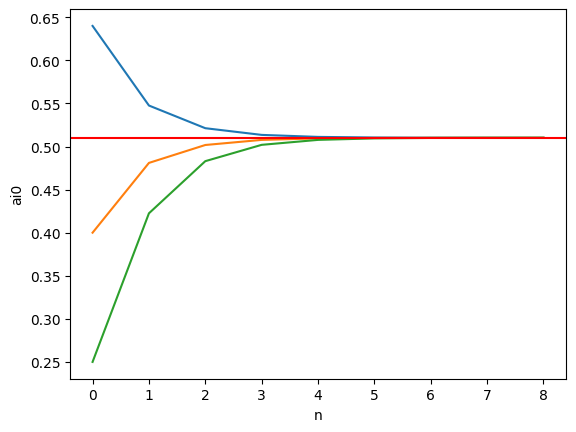

In [6]:
plot_pi(list_of_powers, 0)

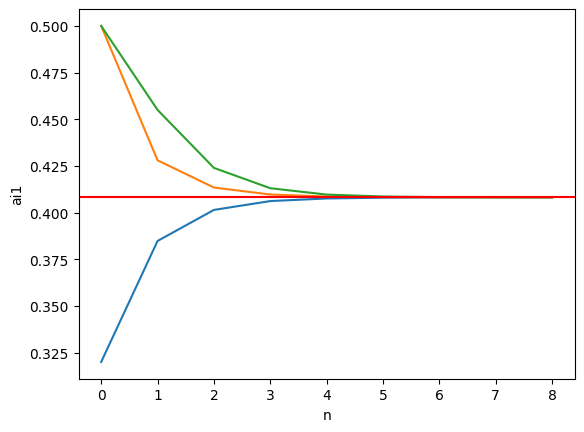

In [7]:
plot_pi(list_of_powers, 1)

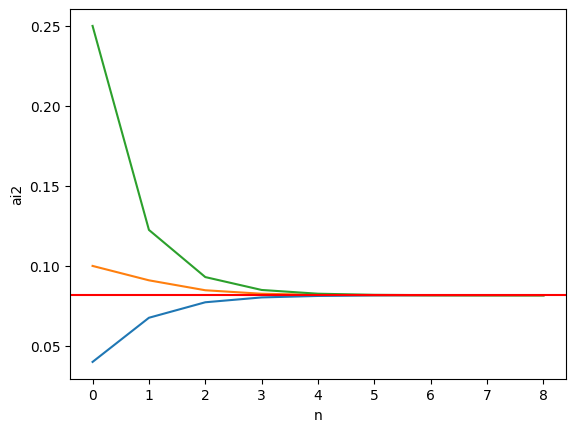

In [8]:
plot_pi(list_of_powers, 2)

Problem B

In [9]:

class MarkowProcess:
    
    def __init__ (self, start_x, N, P):
        self.choice_number = [0, 0, 0]
        self.start_x = start_x
        self.N = N
        self.P = P
        self.PN = np.linalg.matrix_power(self.P, self.N)
    
    def start(self):
        local_choice_n = [0, 0, 0]
        current_x = self.start_x
        for i in range(self.N):
            probability_array = self.P[ current_x, :]
            current_x = np.random.choice(np.arange(0, 3), p=probability_array)
            local_choice_n[current_x] += 1
        self.choice_number = local_choice_n

    def compare(self):
        piexp = []
        for i in self.choice_number:
            piexp.append(i / self.N)
    
        
        
        for i in range(len(piexp)):
            print("Experimental pi{}: {}".format(i, piexp[i]), " P^N pi{}: {}".format(i, self.PN[0, i]))
            

In [10]:
mp = MarkowProcess(0, 10000, P)
mp.start()
mp.compare()

Experimental pi0: 0.508  P^N pi0: 0.51020408163284
Experimental pi1: 0.4097  P^N pi1: 0.4081632653062719
Experimental pi2: 0.0823  P^N pi2: 0.0816326530612544


In [11]:
mp = MarkowProcess(1, 10000, P)
mp.start()
mp.compare()

Experimental pi0: 0.513  P^N pi0: 0.51020408163284
Experimental pi1: 0.4046  P^N pi1: 0.4081632653062719
Experimental pi2: 0.0824  P^N pi2: 0.0816326530612544


In [12]:
mp = MarkowProcess(2, 10000, P)
mp.start()
mp.compare()

Experimental pi0: 0.5083  P^N pi0: 0.51020408163284
Experimental pi1: 0.4092  P^N pi1: 0.4081632653062719
Experimental pi2: 0.0825  P^N pi2: 0.0816326530612544


Problem E

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


def generate_random_exp(lamb, t):
    suma = 0
    ti_list = []
    
    while(suma <= t): 
        ni = np.random.uniform(0, 1)
        ti = -np.log(ni) / lamb
        suma += ti
        ti_list.append(ti)
        
    ti_list.pop()
    return ti_list
    

lambda_ = 1

def single_poisson(t):
    length = []
    for i in range(1000):
        ti = generate_random_exp(lambda_, t)
        length.append(len(ti))

    x_range = np.arange(0, np.max(length)+2, 1)
    y =  poisson.pmf(x_range, mu=lambda_*t)
    if t == 1:   
        plt.hist(length, density=True, bins=[0,1,2,3,4,5,6,7,8])
    else:
        plt.hist(length, density=True, bins=12)
    plt.plot(x_range, y,"bo" )
    plt.show()
    
    print("Mean for t ={} is {}".format(t, np.mean(length)))



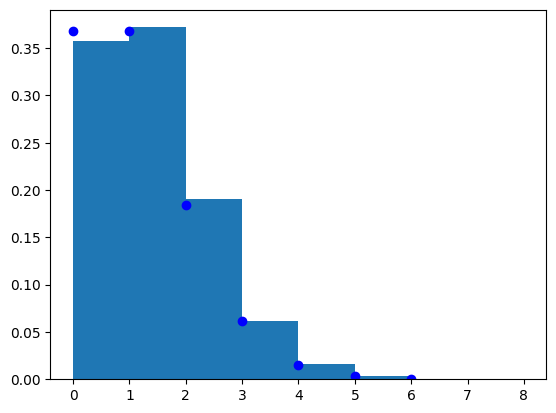

Mean for t =1 is 1.017


In [21]:
single_poisson(1)

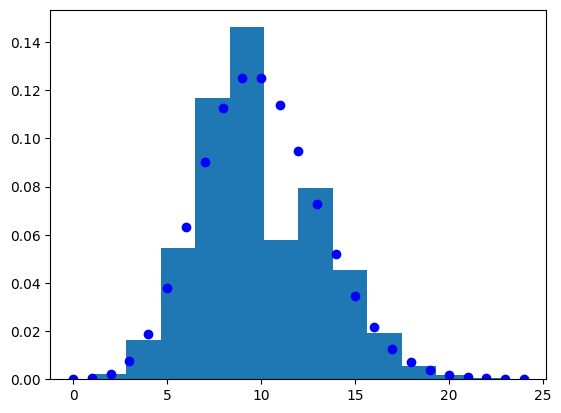

Mean for t =10 is 9.824


In [15]:
single_poisson(10)

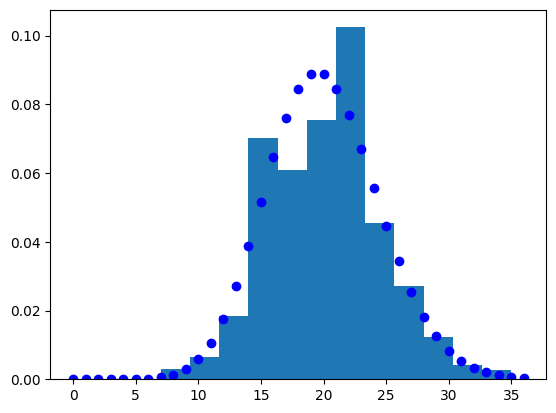

Mean for t =20 is 20.04


In [16]:
single_poisson(20)

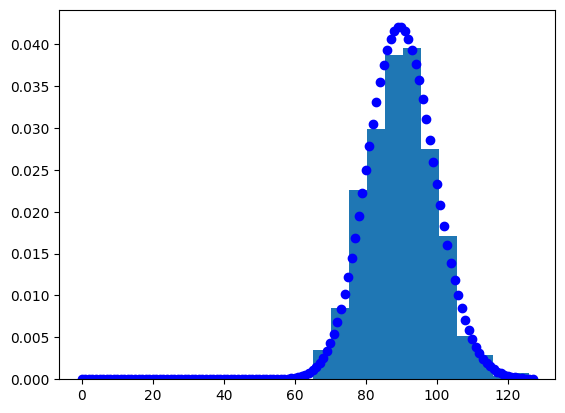

Mean for t =90 is 89.881


In [17]:
single_poisson(90)